# Plot correlation function with error bars using log-normal mocks

In [1]:
import time
from tqdm.notebook import tqdm

import numpy as np
from scipy import optimize as opt
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams.update({'font.size': 14})

from pycorr import TwoPointCorrelationFunction

from densitysplit import catalog_data, density_split
from bin.density_split_mocks_functions import split_density, compute_densitySplit_CCF
from densitysplit.corr_func import *

## Data and output directories

In [2]:
data_dir = '/feynman/work/dphp/mp270220/data/'
output_dir = '/feynman/work/dphp/mp270220/outputs/'

## Get data

In [3]:
#catalog_name = 'AbacusSummit_1Gpc_z1.175'

catalog_name = 'AbacusSummit_2Gpc_z1.175'

#catalog_name = 'AbacusSummit_2Gpc_z0.800'
#catalog_name = 'mock'

catalog = catalog_data.Data.load(data_dir+catalog_name+'.npy')
catalog.shift_boxcenter(-catalog.offset)

## Split density

## Load correlation function poles

In [4]:
ells = [0]
nells = len(ells)

In [5]:
abacus_results = TwoPointCorrelationFunction.load(output_dir+catalog.name+'_2PCF.npy')

[000000.26] [0/1] 06-02 17:32  TwoPointEstimator         INFO     Loading /feynman/work/dphp/mp270220/outputs/AbacusSummit_2Gpc_z1.175_2PCF.npy.


In [6]:
s, abacus_xiell = abacus_results.get_corr(ells=ells, return_sep=True)

## Load log-normal mocks cross-correlation functions

In [7]:
nmocks = 1000

In [8]:
mocks_results = np.load(output_dir+'AbacusSummit_1Gpc_z1.175'+'_10_gaussianMocks_2PCF.npy', allow_pickle=True)

In [9]:
mocks_xiell, cov = get_poles(mocks_results, ells)

cov /= 8.
std = np.array(np.array_split(np.diag(cov)**0.5, nells))

## Plot correlation function with error bars

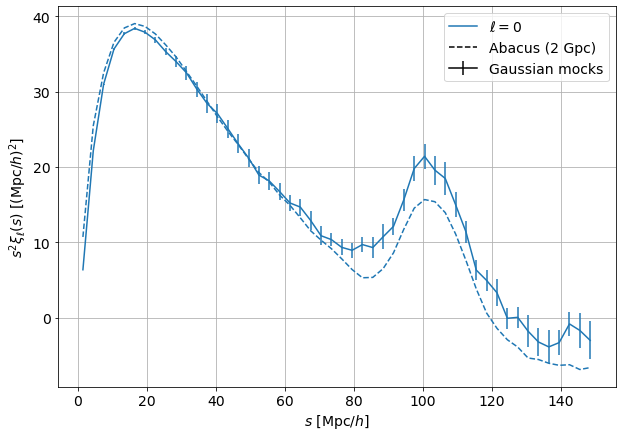

In [11]:
plt.rcParams["figure.figsize"] = (10, 7)

for ill, ell in enumerate(ells):
    plt.plot(s, s**2 * abacus_xiell[ill], linestyle = '--', color='C'+str(ill))
    plt.errorbar(s, s**2 * mocks_xiell[ill], s**2 * std[ill], fmt='-')
    # for legend
    plt.plot([],[], linestyle='-', color='C'+str(ill), label='$\ell = {:d}$'.format(ell))
    plt.grid(True)

plt.plot([],[], linestyle='--', color='black', label='Abacus (2 Gpc)')
plt.errorbar([],[],[], linestyle='-', color='black', label='Gaussian mocks')
plt.xlabel(r'$s$ [$\mathrm{Mpc}/h$]')
plt.ylabel(r'$s^2 \xi_{\ell}(s)$ [$(\mathrm{Mpc}/h)^{2}$]')

plt.legend()
plt.show()